# N Queens with Evolutionary Algorithm

The N Queens problem involves placing N chess queens on an N×N chessboard with no queens attacking each other. This notebook demonstrates an Evolutionary Algorithm's use to efficiently solve this classic problem.

## Evolutionary Algorithm Overview

1. **Initialization:** Generate an initial population of queen placements.
2. **Evaluation:** Assess fitness (number of conflicts) for each solution.
3. **Selection:** Choose the fittest individuals as parents.
4. **Crossover:** Create offspring by combining parent genetic information.
5. **Mutation:** Introduce random changes to maintain diversity.
6. **Replacement:** Update the population with new solutions.
7. **Termination:** Stop at a satisfactory solution or after a set number of generations.


In [258]:
import random
import matplotlib.pyplot as plt

In [259]:
n = 8  # Number of Queens
p = 500  # Number of Population

current_generation = []  # Current Generation
new_generation = []  # New Generation

In [260]:
def randomGeneration(NumberOfRows, NumberOfQueens):
    generation_list = []
    for i in range(NumberOfRows):
        gene = []
        for j in range(NumberOfQueens):
            gene.append(random.randint(1, n))
        gene.append(0)
        generation_list.append(gene)
    return generation_list

## Selection

Calculate the "score" for each generation

By calculating the number of conflicts

And then sort by lowest num of conflicts


In [261]:
def fitness(population_list):
    i = 0
    conflict = 0
    while i < len(population_list):
        j = 0
        conflict = 0
        while j < n:
            l = j+1

            while l < n:
                if population_list[i][j] == population_list[i][l]:
                    conflict += 1
                if abs(j-l) == abs(population_list[i][j]-population_list[i][l]):
                    conflict += 1
                l += 1
            j += 1
        population_list[i][len(population_list[j])-1] = conflict
        i += 1

    for i in range(len(population_list)):
        min = i
        for j in range(i, len(population_list)):
            if population_list[j][n] < population_list[min][n]:
                min = j
        temp = population_list[i]
        population_list[i] = population_list[min]
        population_list[min] = temp
    return population_list

## Crossover correlation


In [262]:
def cross_over(generation_list):
    for i in range(0, len(generation_list), 2):
        z = 0
        new_kid1 = []
        new_kid2 = []
        while z < n:
            if (z < n//2):
                new_kid1.append(generation_list[i][z])
                new_kid2.append(generation_list[i+1][z])
            else:
                new_kid1.append(generation_list[i+1][z])
                new_kid2.append(generation_list[i][z])
            z += 1
        new_kid1.append(0)
        new_kid2.append(0)
        generation_list.append(new_kid1)
        generation_list.append(new_kid2)
    return generation_list

## Add mutation


In [263]:
def mutation(generation_list):
    muted_list = []
    i = 0
    while i < p//2:
        new_rand = random.randint(p//2, p-1)
        if new_rand not in muted_list:
            muted_list.append(new_rand)
            generation_list[new_rand][random.randint(
                0, n-1)] = random.randint(1, n-1)
            # print("Muted:",new_rand)
            i += 1
    return generation_list

In [264]:
def showRes(res):
    l = len(res)
    plt.figure(figsize=(6, 6))
    plt.scatter([x+1 for x in range(l - 1)], res[:l - 1])
    for i in range(l):
        plt.plot([0.5, l - 0.5], [i + 0.5, i + 0.5], color="k")
        plt.plot([i + 0.5, i + 0.5], [0.5, l - 0.5], color="k")

-------------------------------------------------------
Epoch  1
Best Solution:  [7, 3, 8, 2, 7, 1, 6, 1, 2]
-------------------------------------------------------
Epoch  2
Best Solution:  [7, 3, 8, 2, 7, 1, 6, 1, 2]
-------------------------------------------------------
Epoch  3
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------------------------------------------
Epoch  4
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------------------------------------------
Epoch  5
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------------------------------------------
Epoch  6
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------------------------------------------
Epoch  7
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------------------------------------------
Epoch  8
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------------------------------------------
Epoch  9
Best Solution:  [1, 7, 2, 8, 6, 4, 3, 5, 1]
-------------------

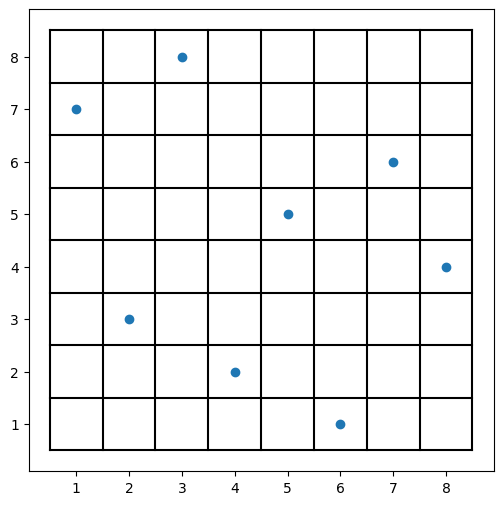

In [265]:
current_generation = randomGeneration(p, n)
current_generation = fitness(current_generation)

epoch = 1
while True:
    print("-------------------------------------------------------")
    print("Epoch ", epoch)

    # Take only the best 1/2 generations
    current_generation = current_generation[0:p//2]

    # And then perform a Genetic Combination
    new_generation = cross_over(current_generation)
    new_generation = mutation(new_generation)

    current_generation = new_generation
    current_generation = fitness(current_generation)
    if current_generation[0][n] == 0:
        print("Solution Found: ", current_generation[0])
        showRes(current_generation[0])
        break
    else:
        print("Best Solution: ", current_generation[0])
        # showRes(current_generation[0])
    epoch += 1